Start of the code, initialization.

In [2]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import copy

#Create a dictionary where it contains the book names and the number of words in each book
book_dict = {'Authors':{'Tolstoy':'',
                        'Dostoyevsky':'',
                        'Dickens':''}, 
             'Genre':{ 'Horror':'',
                       'Scifi':'',
                       'Mystery':''}}


Part C&D&E

In [2]:

class Preprocess:
    '''
    This class preprocesses the text files. It removes the special characters, stop words and tokenizes the text files.
        Input: book_dict # dictionary of the books and the number of words in each book 
                save # True or False. If True, it saves the text files as txt files
                stopWord # True or False. If True, it removes the stop words

        Output: Preprocessed text files
    '''
    def __init__(self, book_dict, save=True, stopWord=True):
        self.dictionary_of_Books = book_dict.copy() #create a copy of the dictionary
        for key in self.dictionary_of_Books:
            for sub_key in self.dictionary_of_Books[key]:
                text_files = [f for f in os.listdir(os.getcwd()) if f.startswith(sub_key)] 
                self.dictionary_of_Books[key][sub_key] = text_files 
        self.filtered_dictionary_of_Books = self.Preprocessor(copy.deepcopy(self.dictionary_of_Books),copy.deepcopy(book_dict), save, stopWord)  

        

    #create a new directory inside the current directory   
    def createDirectory(self, directory_name):
        if not os.path.exists(directory_name):
            os.makedirs(directory_name)

    def Preprocessor(self, book_dict, book_dict_filtered, save, stopWord): # Main function to preprocess the text files
        for key in book_dict: #loop through the dictionary
            for sub_key in book_dict[key]: #loop through the sub dictionary
                text_final_all = {} #create an empty dict
                for book_dict_sub_key in book_dict[key][sub_key]: #loop through the text files

                    stop_words = self.get_StopWords() #get the stop words
                    text_tokenized = self.Tokenize(book_dict_sub_key) #tokenize the text files
                    text_filtered = self.RemoveSpecialCharacters(text_tokenized) #remove special characters

                    if stopWord==True: #if stopWord is True
                        text_final = self.RemoveStopWords(text_filtered, stop_words)    #remove stop words
                        self.createDirectory(os.getcwd()+'\\'+'SW') #create a new directory
                    else: #if stopWord is False
                        text_final = text_filtered #do not remove stop words
                        self.createDirectory(os.getcwd()+'\\'+'noSW') #create a new directory

                    text_final_all[book_dict_sub_key] = text_final #add the text to the dictionary


                    if save == True: #if save is True
                        #change directory
                        if stopWord==True: #if stopWord is True
                            os.chdir(os.getcwd()+'\\'+'SW') #change directory 
                        else: #if stopWord is False
                            os.chdir(os.getcwd()+'\\'+'noSW') #change directory  
                        text_df=pd.DataFrame(text_final) #convert the text to dataframe
                        text_df.rename(columns={0: 'Word'}, inplace=True) #rename the column
                        text_df.to_csv(book_dict_sub_key[:-4]+'_StopWord_'+str(stopWord)+'.csv', sep=",", index=False, header=True) #save the text as csv file

                        self.createDirectory(os.getcwd()+'\\'+'freqFiles') #create a new directory
                        os.chdir(os.getcwd()+'\\'+'freqFiles') #change directory

                        freq_df = self.create_FrequencyFile(book_dict_sub_key,text_df, save, stopWord) #create the frequency file and save it

                        os.chdir('..') #change directory
                        os.chdir('..') #change directory
                    else:
                        continue  

                book_dict_filtered[key][sub_key] = text_final_all #add the text to the dictionary
                    
        return book_dict_filtered.copy() #return the dictionary
    
    def get_StopWords(self): #function to get the stop words
        with open('stop_words_english.txt') as f: #open the stop words file
            stop_words = f.read().splitlines() #read the file and split the lines
        return stop_words #return the stop words
    
    def RemoveStopWords(self,text, stop_words): #function to remove stop words
        text = [word for word in text if word not in stop_words] #remove stop words from the text
        return text     #return the text
    
    def RemoveSpecialCharacters(self,text): #function to remove special characters
        fix_dictionary = {" isn't":" is not ", " isn’t ": "is not", " don't ":" do not ",\
                    "don’t": " do not ","would'nt":" would not","would’t":" would not ","aren't":"are not",\
                    "aren’t":"are not", "can't":"can not", "can’t": "can not", " won't" : " will not", " won’t ": " will not " ,\
                    "had'nt":"had not", " hadn’t ": " had not " ,  " 're " : " are " , " ’re ":" are ",  " 've ": " have " , " ’ve ": "  have ", \
                    "n’t":" not ", " n't ": " not ", "’s":"  ", "'s ": "  ", " ’ll ": " will ", " 'll ": " will" } #dictionary to fix the words
        special_characters = ["\"", "’" ,"‘", "'", "(", ")",".","," ,"-","_","!","?","$","*","“","”",";","{","}","[","]","=","&","#","<",">",\
                     'à', 'æt', 'ætat',"1","2","3","4","5","6","7","8","9","0","*",":","~","£","—","ς"] #list of special characters
        
        for key, value in fix_dictionary.items(): #loop to fix the words
            text= [word.replace(key,value) for word in text] #replace the words with the correct words
        for i in special_characters: #loop to remove special characters
            text = [word.replace(i, " ") for word in text] #replace special characters with empty string
        #remove empty white space in each word string
        text = [word.strip() for line in text for word in line.split()] #remove empty white space in each word string
        return text 
    
    def Tokenize(self,book_dict_sub_key):#function to tokenize the text files
            with open(book_dict_sub_key, 'r',encoding='utf8') as f:
                text=f.read().lower() #read the text and convert it to lower case
            return text.split() #split the text into words
    
    def create_FrequencyFile(self,book_dict_sub_key, words_df, save, stopword): #function to create the frequency file
        freq = words_df['Word'].value_counts() #get the frequency of each word
        freq_df: pd.DataFrame = freq.to_frame() #convert the frequency to dataframe
        freq_df.reset_index(inplace=True) #reset the index
        freq_df.rename(columns={'Word': 'Frequency', 'index': 'Word'}, inplace=True) #rename the columns
        freq_df['Rank'] = freq_df['Frequency'].rank(ascending=False, method='first') #get the rank of each word
        freq_df['F*R'] = freq_df['Rank'] * freq_df['Frequency'] #get the product of rank and frequency
        freq_df['log(Frequency)'] = np.log(freq_df['Frequency']) #get the log of frequency
        freq_df['log(Rank)'] = np.log(freq_df['Rank']) #get the log of rank
        if save==True: 
            freq_df.to_csv('Freq_'+book_dict_sub_key[:-4]+'_StopWord_'+str(stopword)+'.csv', sep=',', index=False, header=True) #save the file as csv file
            return None #return None
        else:
            return freq_df.copy() #return the dataframe



In [3]:
preprocessed_dict_noSW=Preprocess(copy.deepcopy(book_dict), save=True, stopWord=False) #preprocess the text files with stop words

In [3]:
preprocessed_dict_SW=Preprocess(copy.deepcopy(book_dict), save=False, stopWord=True) #preprocess the text files with stop words removed

Part F

In [9]:
freq_df = pd.read_csv(os.getcwd()+ '\\'+ 'SW' + '\\' + 'freqFiles' + '\\' + "Freq_Tolstoy_1_WarPeace_StopWord_True"+'.csv'
                )

#drop the first column which is the index
print(freq_df)


           Word  Frequency     Rank      F*R  log(Frequency)  log(Rank)
0        pierre       1963      1.0   1963.0        7.582229   0.000000
1        prince       1928      2.0   3856.0        7.564238   0.693147
2       natásha       1213      3.0   3639.0        7.100852   1.098612
3           man       1189      4.0   4756.0        7.080868   1.386294
4        andrew       1143      5.0   5715.0        7.041412   1.609438
...         ...        ...      ...      ...             ...        ...
16819    canter          1  16820.0  16820.0        0.000000   9.730324
16820       tug          1  16821.0  16821.0        0.000000   9.730383
16821   dappled          1  16822.0  16822.0        0.000000   9.730443
16822  clanging          1  16823.0  16823.0        0.000000   9.730502
16823    unreal          1  16824.0  16824.0        0.000000   9.730562

[16824 rows x 6 columns]


In [53]:
#Combine all the word/frequency files into one file for each author
for author_index in (book_dict['Authors'].keys()):
        for sw in [False,True]:
                sw_part = 'SW' if sw else 'noSW'
                dfs = []

                for book_index in preprocessed_dict_SW.dictionary_of_Books['Authors'][author_index]:    
                    file_path=os.getcwd()+'\\'+sw_part+'\\'+book_index[:-4]+'_StopWord_'+str(sw)+'.csv'
                    df = pd.read_csv(file_path, index_col=False)
                    dfs.append(df)
                    
                # create word file
                word_df = pd.concat(dfs, ignore_index=True)
                word_file_path = os.getcwd()+'\\'+sw_part+'\\'+author_index+'_StopWord_'+str(sw)+'.csv'
                word_df.to_csv(word_file_path, sep=",", index=False, header=True)

                # create frequency file
                freq_file_path = os.getcwd()+'\\'+sw_part+'\\'+'freqFiles'+'\\'+author_index+'_StopWord_'+str(sw)+'.csv'
                freq = word_df['Word'].value_counts()
                freq_df: pd.DataFrame = freq.to_frame()
                freq_df.reset_index(inplace=True)
                freq_df.rename(columns={'Word': 'Frequency', 'index': 'Word'}, inplace=True)
                freq_df['Rank'] = freq_df['Frequency'].rank(ascending=False, method='first')
                freq_df['F*R'] = freq_df['Rank'] * freq_df['Frequency']
                freq_df['log(Frequency)'] = np.log(freq_df['Frequency'])
                freq_df['log(Rank)'] = np.log(freq_df['Rank'])
                freq_df.to_csv(freq_file_path, sep=',', index=False, header=True)

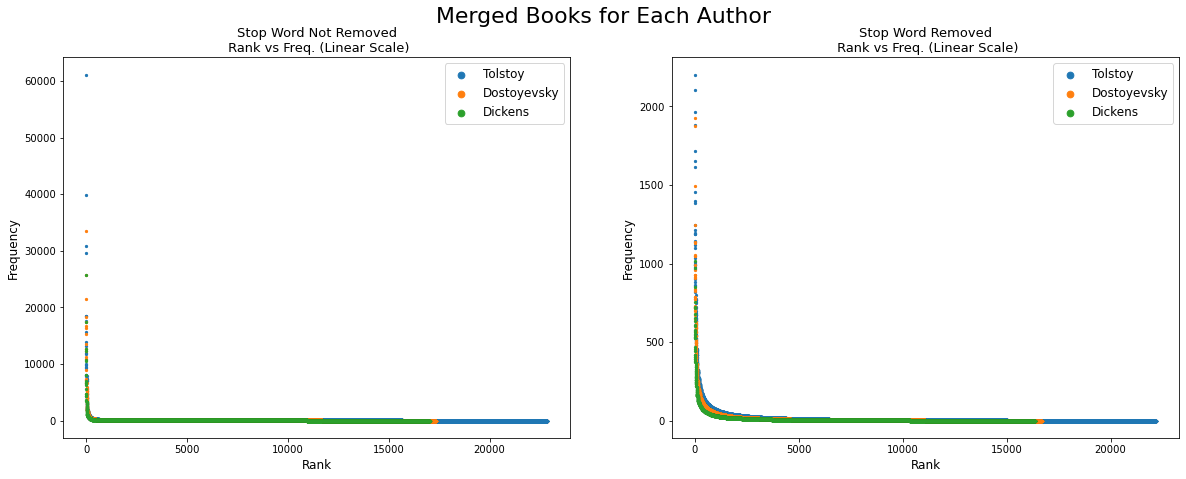

In [159]:
#Plot the frequency of the words for each author as a scatter plot. two subplots for each author, one with stop words and one without stop words
fig, (ax1, ax2) = plt.subplots(1,2)
#adjust subplots size   
fig.set_size_inches(20, 7)
fig.suptitle('Merged Books for Each Author', fontsize=22)
for sw in [False,True]:
    for author_index in (book_dict['Authors'].keys()):
            sw_part = 'SW' if sw else 'noSW'
            title = 'Stop Word Removed\n Rank vs Freq. (Linear Scale)' if sw else 'Stop Word Not Removed\n Rank vs Freq. (Linear Scale)'
            axis= ax2 if sw else ax1
            freq_file_path = os.getcwd()+'\\'+sw_part+'\\'+'freqFiles'+'\\'+author_index+'_StopWord_'+str(sw)+'.csv'
            freq_df = pd.read_csv(freq_file_path, index_col=False)
            axis.scatter(freq_df['Rank'], freq_df['Frequency'], s=5)
            axis.set_title(title, fontsize=13)
            axis.set_xlabel('Rank', fontsize=12)
            axis.set_ylabel('Frequency', fontsize=12)
            lgnd=axis.legend(book_dict['Authors'].keys(), prop={'size': 12}, markerscale=3)

fig.savefig(os.getcwd()+'\\'+'Merged_Books_for_Each_Author.png', dpi=300)

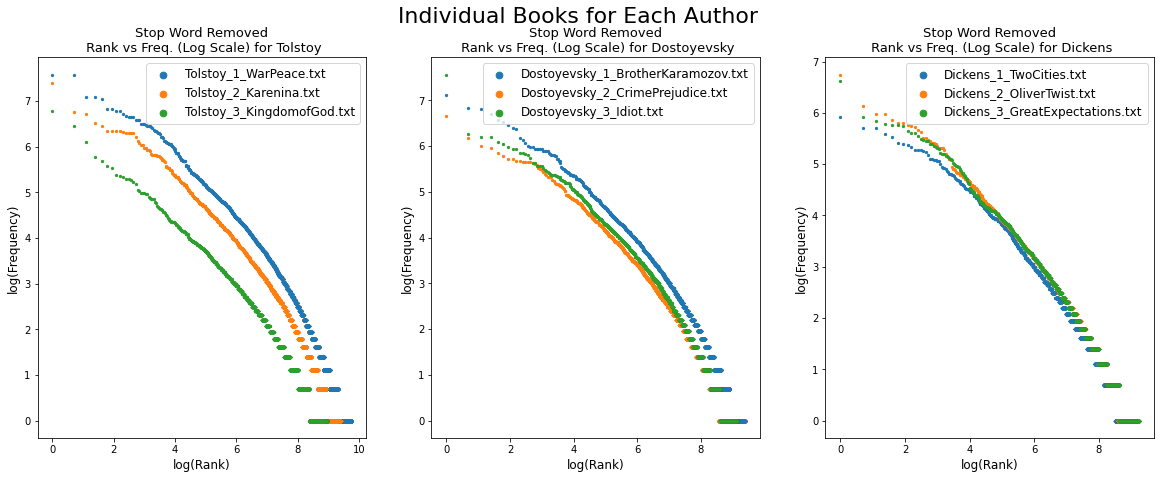

In [190]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
axes = [ax1, ax2, ax3]
#adjust subplots size   
fig.set_size_inches(20, 7)
fig.suptitle('Individual Books for Each Author', fontsize=22)
author_indx_int=0
for author_index in (book_dict['Authors'].keys()):
        axis=axes[author_indx_int]
        for subkey in preprocessed_dict_SW.dictionary_of_Books['Authors'][author_index]:
            sw_part = 'SW'
            title = 'Stop Word Removed\n Rank vs Freq. (Log Scale) for '+author_index
            freq_file_path = os.getcwd()+'\\'+sw_part+'\\'+'freqFiles'+'\\'+'Freq_'+subkey[:-4]+'_StopWord_'+str(sw)+'.csv'
            freq_df = pd.read_csv(freq_file_path, index_col=False)
            axis.scatter(freq_df['log(Rank)'], freq_df['log(Frequency)'], s=5)
            axis.set_title(title, fontsize=13)
            axis.set_xlabel('log(Rank)', fontsize=12)
            axis.set_ylabel('log(Frequency)', fontsize=12)
        lgnd=axis.legend(preprocessed_dict_SW.dictionary_of_Books['Authors'][author_index], prop={'size': 12}, markerscale=3,loc='upper right')
        author_indx_int+=1
fig.savefig(os.getcwd()+'\\'+'Individual_Books_for_Each_Author.png', dpi=300)

Part G

In [64]:
# Define a function to compute the vocabulary size and type-token ratio
from collections import defaultdict  # For the type-token ratio

def compute_typetoken(df): # df is a pandas DataFrame
    typetoken = np.zeros(len(df.index)) # Initialize the output array
    freqs = defaultdict(int) # Initialize the dictionary
    type_count = 0 # Initialize the counters
    for i, word in enumerate(df["Word"]):   # Loop over the words
        typetoken[i] = type_count 
        freqs[word] += 1 # Increment the frequency of the word
        if freqs[word] == 1: # If the word is new, increment the type count
            type_count += 1  
    return typetoken 


In [19]:
# Loop over the authors and stopword settings
for author in book_dict["Authors"]:
    for use_stopwords in [False, True]:
        # Read the input file and compute the typetoken measures
        filename = f"{author}_StopWord_{str(use_stopwords)}.csv"
        path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", filename)
        df = pd.read_csv(path)
        typetoken = compute_typetoken(df)

        # Create the output DataFrame and write it to a file
        output_filename = f"typettoken_{author}.csv"
        output_path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", output_filename)

        typetoken_df = pd.DataFrame(typetoken)
        typetoken_df.reset_index(inplace=True)
        typetoken_df.rename(columns={'index': 'Token Size', 0: 'Vocabulary Size'}, inplace=True)
        typetoken_df['Vocabulary Size'] = typetoken_df['Vocabulary Size'].astype(dtype='int64')
        typetoken_df['log(Vocabulary Size)'] = np.log(typetoken_df['Vocabulary Size'])
        typetoken_df['log(Token Size)'] = np.log(typetoken_df['Token Size'])
        typetoken_df.to_csv(output_path, sep=',', index=False, header=True)

c:\Users\ataka\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
def TypeToken_plots(book_dict, remove_sw=True, is_author=True):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(20, 7)
    plt_title = 'Type Token Ratio for Each Author' if is_author else 'Type Token Ratio for Each Genre'
    dict_select='Authors' if is_author else 'Genre'
    fig.suptitle(plt_title, fontsize=22)
    for log_log in [False,True]:

        title_sw_part = 'Stop Words Removed' if remove_sw else 'Stop Words Not Removed'
        sw_part = 'SW' if remove_sw else 'noSW'
        x, x_label = ('log(Token Size)', 'log(Token Size)') if log_log else ("Token Size", "Token Size")
        y, y_label = ('log(Vocabulary Size)', 'log(Vocabulary Size)') if log_log else ("Vocabulary Size", "Vocabulary Size")
        title = f'{title_sw_part}\n {x} vs {y}'

        axis= ax2 if log_log else ax1
        
        for author in book_dict[dict_select]:
            file_path = f"typettoken_{author}.csv"
            file_path = os.path.join(os.getcwd(),sw_part, file_path)
            df = pd.read_csv(file_path, index_col=False)
            axis.scatter(df[x], df[y],  s=16)

        axis.set_xlabel(x_label)
        axis.set_ylabel(y_label)
        axis.set_title(title, fontsize=13)
        axis.legend(book_dict[dict_select].keys(), prop={'size': 12}, markerscale=3)

        
        
    plt_path_author = 'author' if is_author else 'genre'
    output_path = f"TypeToken_plt_{plt_path_author}_{sw_part}.png"
    output_file_path = os.path.join(os.getcwd(),output_path)
    fig.savefig(output_file_path, dpi=300)

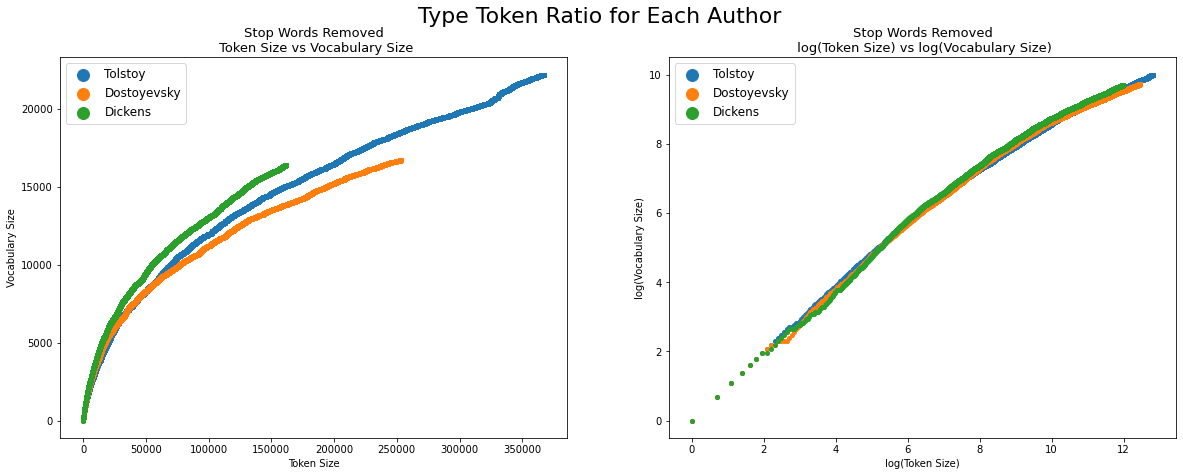

In [7]:

TypeToken_plots(book_dict, remove_sw=True, is_author=True) # Author Type Token Ratio for Stop Words Removed

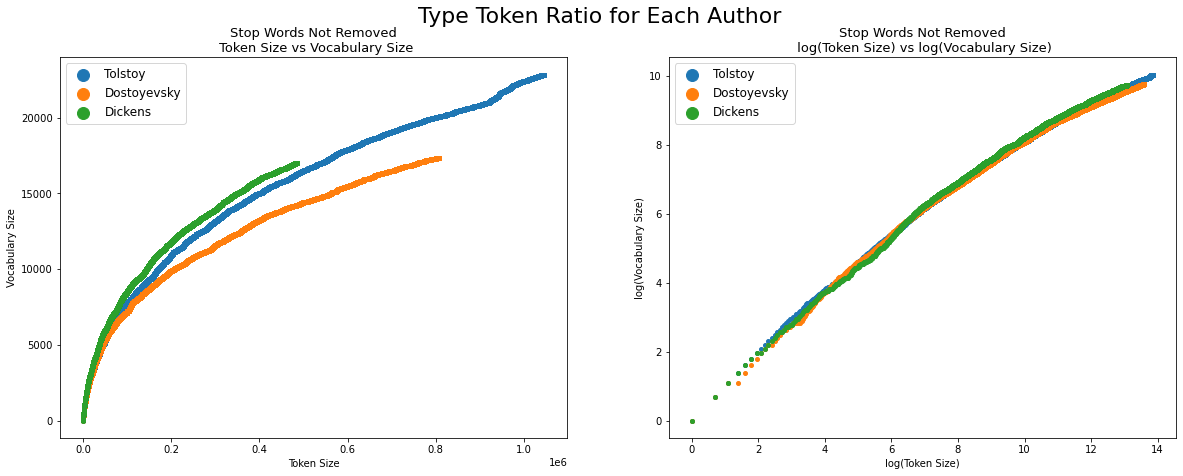

In [6]:
TypeToken_plots(book_dict, remove_sw=False, is_author=True) # Author Type Token Ratio for Stop Words Not Removed

Part H

In [20]:
# Loop over the authors and stopword settings
for author in book_dict["Authors"]:
    for use_stopwords in [False, True]:
        for subkey in preprocessed_dict_SW.dictionary_of_Books['Authors'][author]:
            # Read the input file and compute the typetoken measures
            filename = f"{subkey[:-4]}_StopWord_{str(use_stopwords)}.csv"
            path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", filename)
            df = pd.read_csv(path)
            typetoken = compute_typetoken(df)

            # Create the output DataFrame and write it to a file
            output_filename = f"typettoken_{subkey[:-4]}.csv"
            output_path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", output_filename)

            typetoken_df = pd.DataFrame(typetoken)
            typetoken_df.reset_index(inplace=True)
            typetoken_df.rename(columns={'index': 'Token Size', 0: 'Vocabulary Size'}, inplace=True)
            typetoken_df['Vocabulary Size'] = typetoken_df['Vocabulary Size'].astype(dtype='int64')
            typetoken_df['log(Vocabulary Size)'] = np.log(typetoken_df['Vocabulary Size'])
            typetoken_df['log(Token Size)'] = np.log(typetoken_df['Token Size'])
            typetoken_df.to_csv(output_path, sep=',', index=False, header=True)

In [22]:
def TypeToken_plots_eachBook(book_dict, remove_sw=True, is_author=True):
    fig,ax = plt.subplots(2,2)
    fig.set_size_inches(20, 15)
    plt_title = 'Type Token Ratio for Each Book of Author' if is_author else 'Type Token Ratio for Each Book of Genre'
    dict_select='Authors' if is_author else 'Genre'
    fig.suptitle(plt_title, fontsize=22)
    axes = ax.ravel()
    #axes=[ax1, ax2, ax3, ax4]
    ax_counter=0
    colors=['red','red','red', 'blue','blue', 'blue',  'green','green','green']
    for author in book_dict[dict_select]:

        title_sw_part = 'Stop Words Removed' if remove_sw else 'Stop Words Not Removed'
        sw_part = 'SW' if remove_sw else 'noSW'
        x, x_label = ('log(Token Size)', 'log(Token Size)') 
        y, y_label = ('log(Vocabulary Size)', 'log(Vocabulary Size)') 
        title = f'{title_sw_part}\n {x} vs {y}'

        axis= axes[ax_counter]
        ax_counter+=1
        if ax_counter==3:
            for subkey in book_dict[dict_select][author]:
                file_path = f"typettoken_{subkey[:-4]}.csv"
                file_path = os.path.join(os.getcwd(),sw_part, file_path)
                df = pd.read_csv(file_path, index_col=False)
                axis.scatter(df[x], df[y],  s=8)

            axis.legend(book_dict[dict_select][author], prop={'size': 12}, markerscale=3)
            axis.set_title(title, fontsize=13)
            axis.set_xlabel(x_label)
            axis.set_ylabel(y_label)
            axis= axes[ax_counter]
            
            
            slopes={}
            for keys, values in book_dict[dict_select].items():
             for value in values:
                file_path = f"typettoken_{value[:-4]}.csv"
                file_path = os.path.join(os.getcwd(),sw_part, file_path)
                df = pd.read_csv(file_path, index_col=False)
                axis.scatter(df[x], df[y],  s=8, color=colors.pop(0))
                
                #Find the slope of df[x], df[y] 
                df.drop([0], inplace=True)
                theta= np.polyfit(df[x], df[y], 1)
                slopes[value]=theta[0]

            allbooks=list(book_dict[dict_select].values())
            concat_list = [j for i in allbooks for j in i]
            
            axis.legend(concat_list, prop={'size': 12}, markerscale=3)
            axis.set_title(title, fontsize=13)
        else:
            for subkey in book_dict[dict_select][author]:
                file_path = f"typettoken_{subkey[:-4]}.csv"
                file_path = os.path.join(os.getcwd(),sw_part, file_path)
                df = pd.read_csv(file_path, index_col=False)
                axis.scatter(df[x], df[y],  s=8)
            axis.legend(book_dict[dict_select][author], prop={'size': 12}, markerscale=3)

        axis.set_xlabel(x_label)
        axis.set_ylabel(y_label)
        axis.set_title(title, fontsize=13)
        

        
        
    plt_path_author = 'author' if is_author else 'genre'
    output_path = f"TypeToken_eachBook_plt_{plt_path_author}_{sw_part}.png"
    output_file_path = os.path.join(os.getcwd(),output_path)
    fig.savefig(output_file_path, dpi=300)
    return slopes

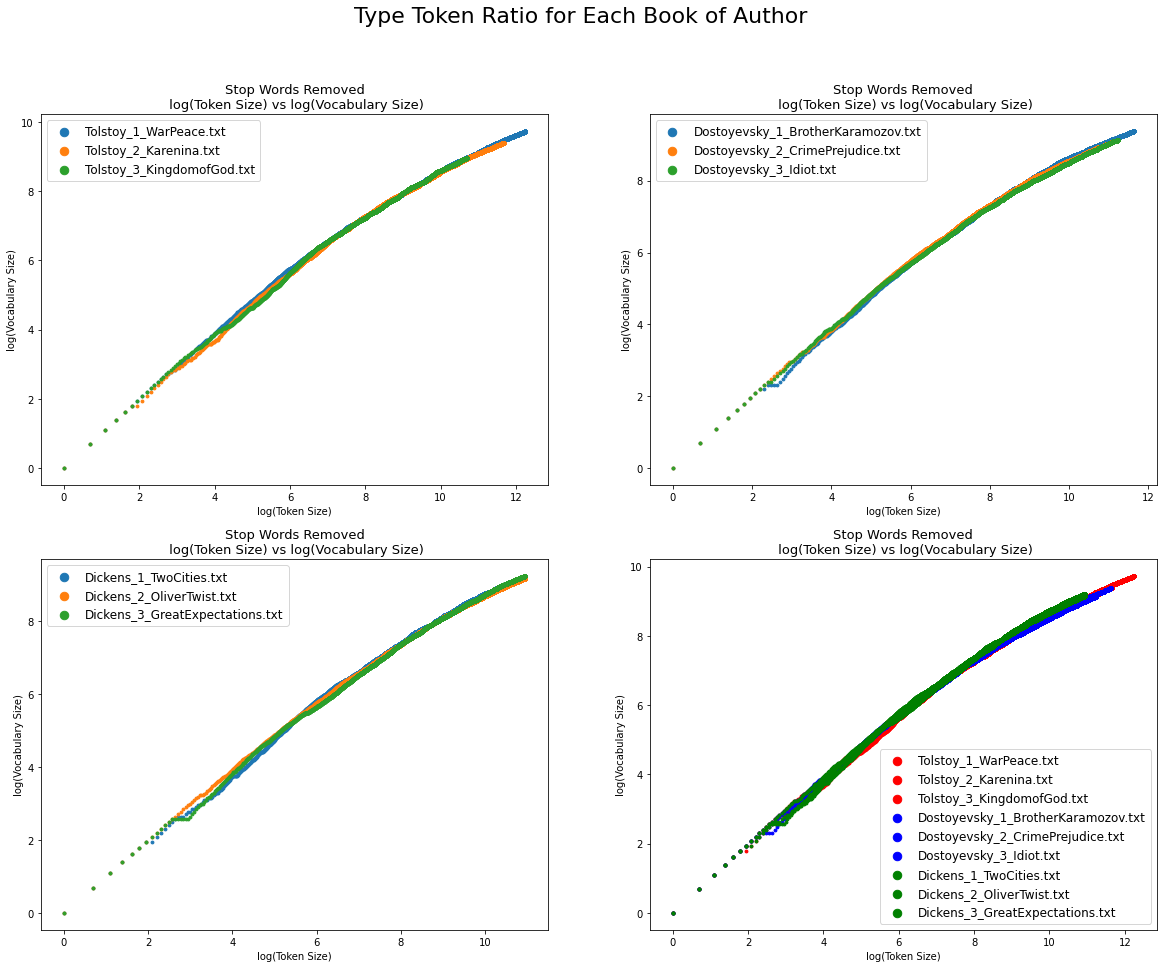

In [24]:
slopes_SW=TypeToken_plots_eachBook(preprocessed_dict_SW.dictionary_of_Books, remove_sw=True, is_author=True)  # Author Type Token Ratio for Stop Words Removed

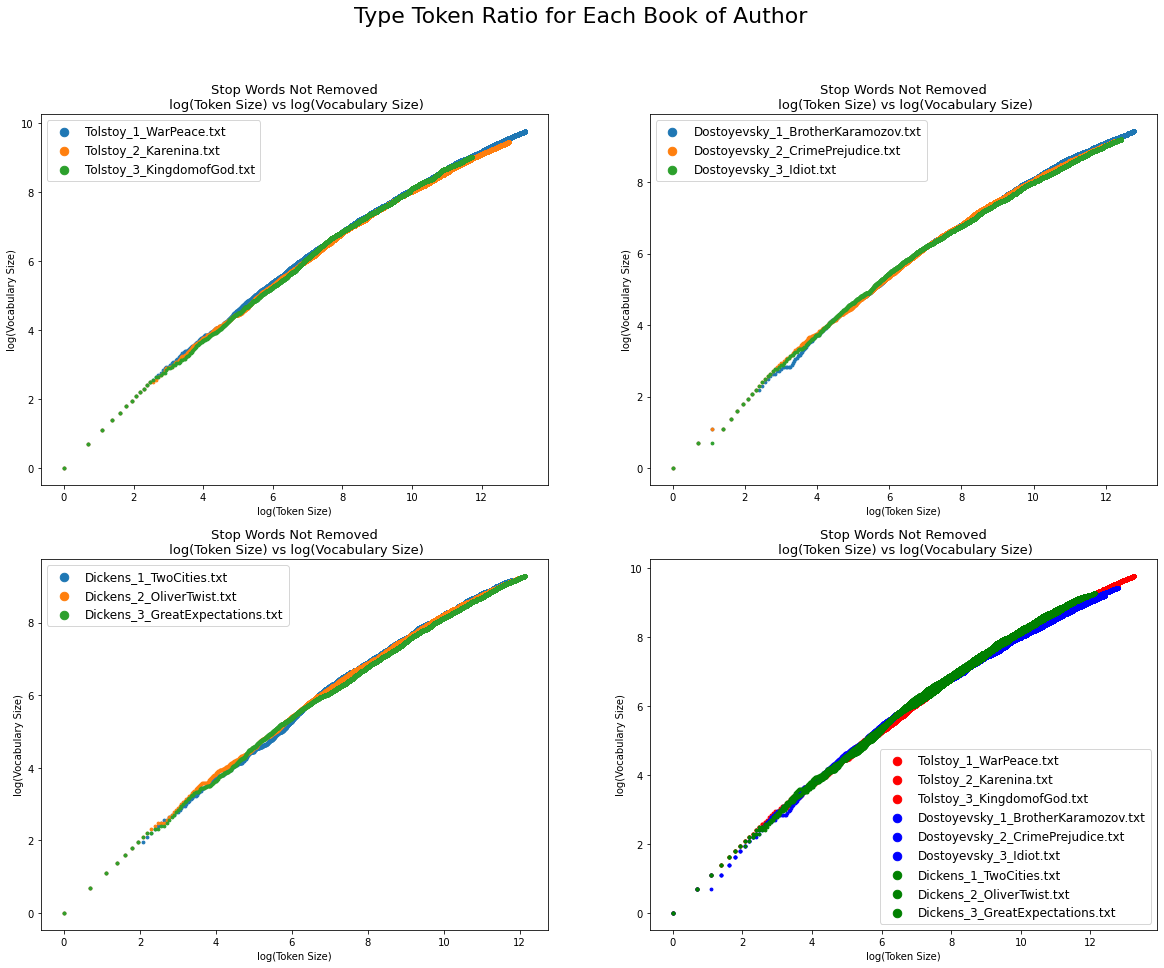

In [26]:
slopes_noSW=TypeToken_plots_eachBook(preprocessed_dict_SW.dictionary_of_Books, remove_sw=False, is_author=True) # Author Type Token Ratio for Stop Words Not Removed

Part I

In [34]:
print(f'Authors_noSW: {slopes_noSW}')
print(f'Authors_SW: {slopes_SW}')

Authors_noSW: {'Tolstoy_1_WarPeace.txt': 0.5283280811703643, 'Tolstoy_2_Karenina.txt': 0.5414325527018056, 'Tolstoy_3_KingdomofGod.txt': 0.6073055143580179, 'Dostoyevsky_1_BrotherKaramozov.txt': 0.5134167455376281, 'Dostoyevsky_2_CrimePrejudice.txt': 0.5335225925513495, 'Dostoyevsky_3_Idiot.txt': 0.5406473000925587, 'Dickens_1_TwoCities.txt': 0.6002817285916079, 'Dickens_2_OliverTwist.txt': 0.5820680145423407, 'Dickens_3_GreatExpectations.txt': 0.6011384409351436}
Authors_SW: {'Tolstoy_1_WarPeace.txt': 0.5716027018084713, 'Tolstoy_2_Karenina.txt': 0.5966922029403807, 'Tolstoy_3_KingdomofGod.txt': 0.6815621485761856, 'Dostoyevsky_1_BrotherKaramozov.txt': 0.5757544480533856, 'Dostoyevsky_2_CrimePrejudice.txt': 0.6017062074828652, 'Dostoyevsky_3_Idiot.txt': 0.6092418715094732, 'Dickens_1_TwoCities.txt': 0.6769871744384999, 'Dickens_2_OliverTwist.txt': 0.648510572434092, 'Dickens_3_GreatExpectations.txt': 0.6826284124096695}


Part J

In [36]:
# Loop over the authors and stopword settings
for author in book_dict["Genre"]:
    for use_stopwords in [False, True]:
        for subkey in preprocessed_dict_SW.dictionary_of_Books['Genre'][author]:
            # Read the input file and compute the typetoken measures
            filename = f"{subkey[:-4]}_StopWord_{str(use_stopwords)}.csv"
            path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", filename)
            df = pd.read_csv(path)
            typetoken = compute_typetoken(df)

            # Create the output DataFrame and write it to a file
            output_filename = f"typettoken_{subkey[:-4]}.csv"
            output_path = os.path.join(os.getcwd(), "SW" if use_stopwords else "noSW", output_filename)

            typetoken_df = pd.DataFrame(typetoken)
            typetoken_df.reset_index(inplace=True)
            typetoken_df.rename(columns={'index': 'Token Size', 0: 'Vocabulary Size'}, inplace=True)
            typetoken_df['Vocabulary Size'] = typetoken_df['Vocabulary Size'].astype(dtype='int64')
            typetoken_df['log(Vocabulary Size)'] = np.log(typetoken_df['Vocabulary Size'])
            typetoken_df['log(Token Size)'] = np.log(typetoken_df['Token Size'])
            typetoken_df.to_csv(output_path, sep=',', index=False, header=True)

c:\Users\ataka\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


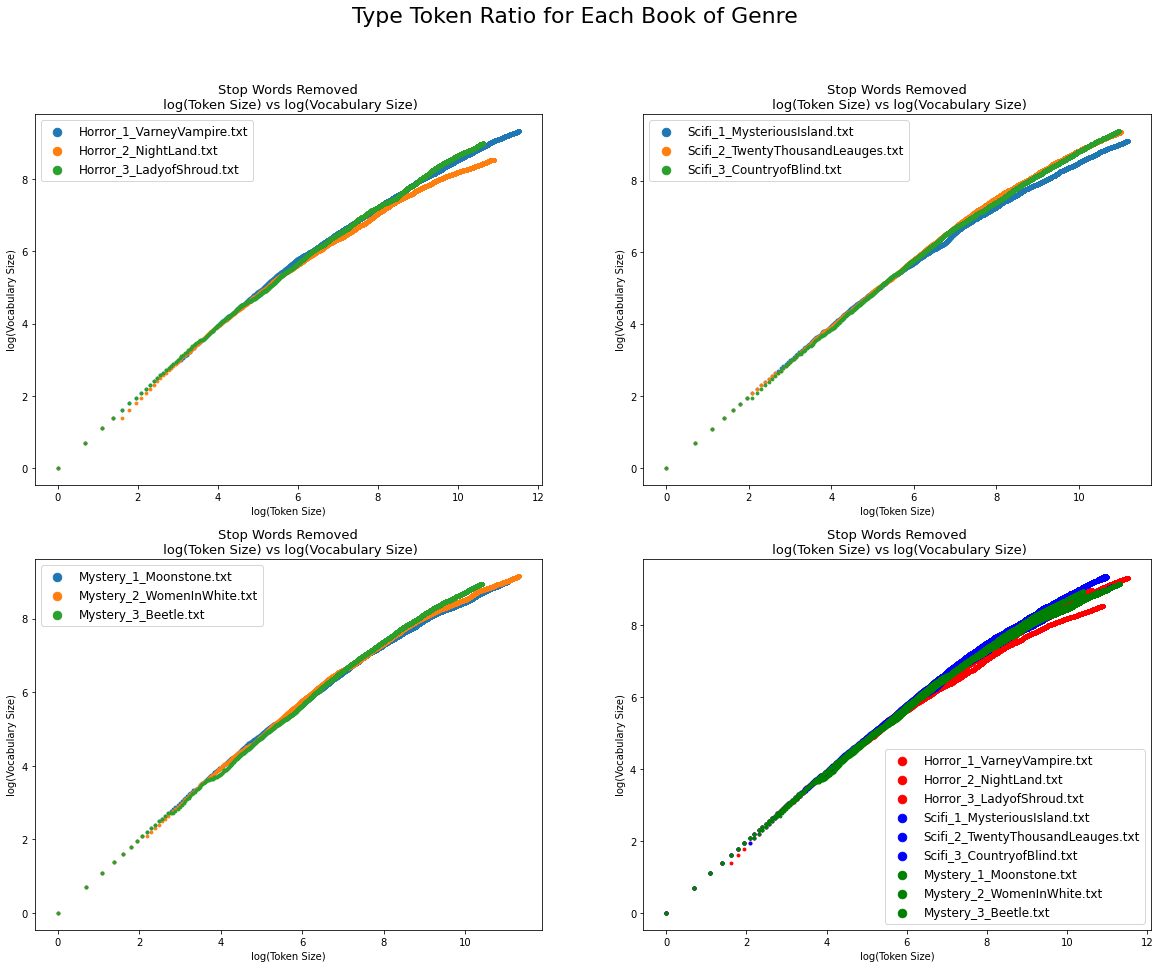

In [37]:
Genre_slopes_SW=TypeToken_plots_eachBook(preprocessed_dict_SW.dictionary_of_Books, remove_sw=True, is_author=False)  # Author Type Token Ratio for Stop Words Removed

In [38]:
print(f'Genre_SW: {Genre_slopes_SW}')

Genre_SW: {'Horror_1_VarneyVampire.txt': 0.6140458268781933, 'Horror_2_NightLand.txt': 0.5538736172546989, 'Horror_3_LadyofShroud.txt': 0.7119166005163082, 'Scifi_1_MysteriousIsland.txt': 0.6092317118652131, 'Scifi_2_TwentyThousandLeauges.txt': 0.6571160776257802, 'Scifi_3_CountryofBlind.txt': 0.6924258432325602, 'Mystery_1_Moonstone.txt': 0.6025393060650084, 'Mystery_2_WomenInWhite.txt': 0.569699200249628, 'Mystery_3_Beetle.txt': 0.714108733156263}


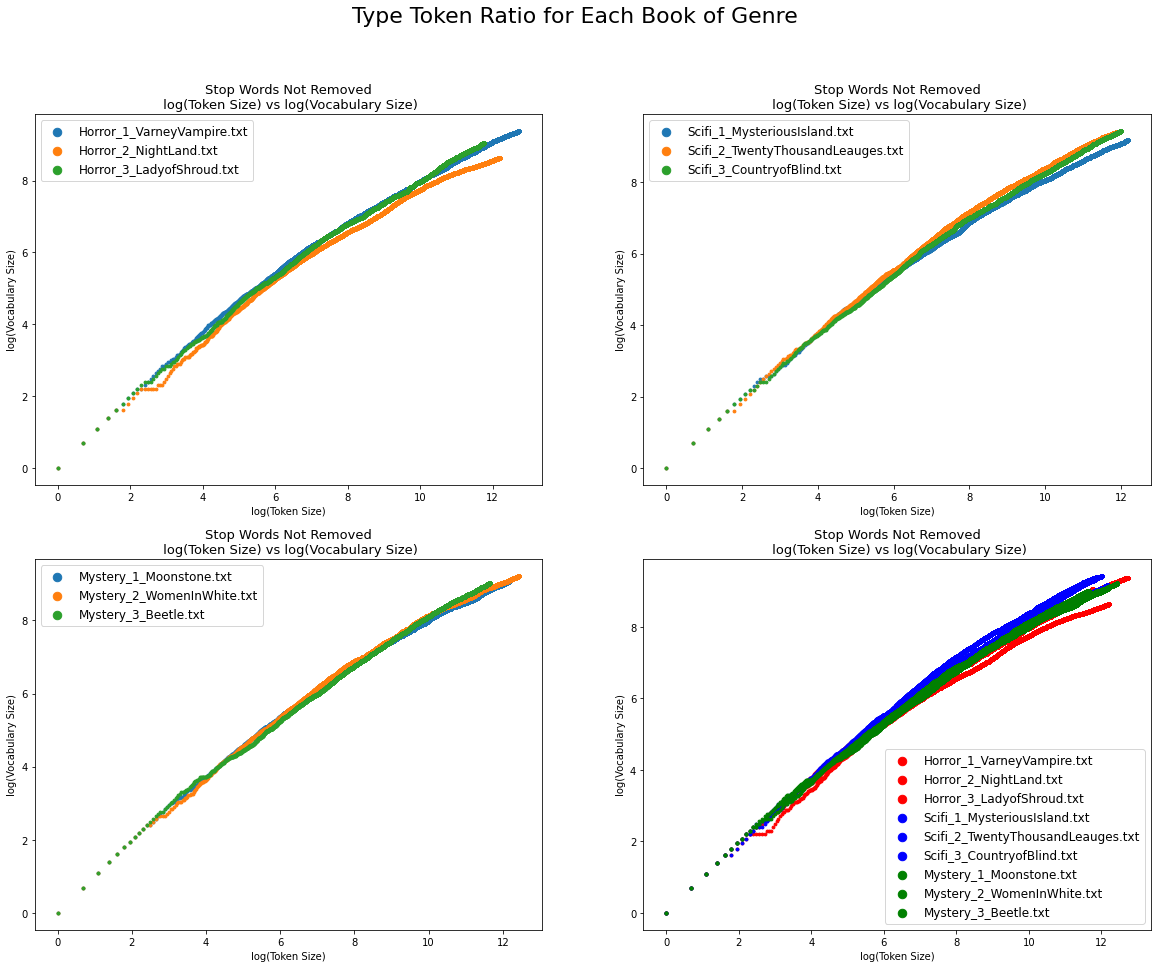

In [39]:
Genre_slopes_noSW=TypeToken_plots_eachBook(preprocessed_dict_SW.dictionary_of_Books, remove_sw=False, is_author=False)  # Author Type Token Ratio for Stop Words Removed

In [40]:
print(f'Genre_noSW: {Genre_slopes_noSW}')

Genre_noSW: {'Horror_1_VarneyVampire.txt': 0.5420605016808412, 'Horror_2_NightLand.txt': 0.4753806484579288, 'Horror_3_LadyofShroud.txt': 0.6239657357694581, 'Scifi_1_MysteriousIsland.txt': 0.5511134830486537, 'Scifi_2_TwentyThousandLeauges.txt': 0.5936517662238169, 'Scifi_3_CountryofBlind.txt': 0.624560889555486, 'Mystery_1_Moonstone.txt': 0.5374148951513222, 'Mystery_2_WomenInWhite.txt': 0.5081996391939552, 'Mystery_3_Beetle.txt': 0.6246936552762803}


Part K

In [91]:
from sklearn.cluster import KMeans
X=np.array(list(slopes_SW.values())).reshape(-1,1)
Y=np.array(list(slopes_noSW.values())).reshape(-1,1)
A=np.array(list(Genre_slopes_SW.values())).reshape(-1,1)
B=np.array(list(Genre_slopes_noSW.values())).reshape(-1,1)

In [92]:
kmeans = KMeans(n_clusters=3, random_state=4).fit(X)
print(f'KMeans labels for 1D Author Data with Stop Words Removed: {kmeans.labels_}')

kmeans = KMeans(n_clusters=3, random_state=4).fit(Y)
print(f'KMeans labels for 1D Author Data with Stop Words: {kmeans.labels_}')

kmeans = KMeans(n_clusters=3, random_state=4).fit(A)
print(f'KMeans labels for 1D Genre Data with Stop Words Removed: {kmeans.labels_}')

kmeans = KMeans(n_clusters=3, random_state=4).fit(B)
print(f'KMeans labels for 1D Genre Data with Stop Words: {kmeans.labels_}')


KMeans labels for 1D Author Data with Stop Words Removed: [0 2 1 0 2 2 1 1 1]
KMeans labels for 1D Author Data with Stop Words: [0 0 1 2 0 0 1 1 1]
KMeans labels for 1D Genre Data with Stop Words Removed: [2 0 1 2 2 1 2 0 1]
KMeans labels for 1D Genre Data with Stop Words: [2 0 1 2 1 1 2 0 1]


Part M

In [60]:
import string
import random

# set the target corpus size in words
corpus_size = 750000
max_word_len = 7

# define a function to generate random words
def generate_word(max_word_len):
    length = random.randint(1, max_word_len)
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))

# generate a list of random words
word_list = [generate_word(max_word_len) for _ in range(corpus_size)]



#convert the list into panda dataframe and save it as csv file
df = pd.DataFrame(word_list)
df.rename(columns={0: 'Word'}, inplace=True)
output_path=os.path.join(os.getcwd(),'random_words.csv')
df.to_csv(output_path)
print(df.head(10))

      Word
0   xqawcw
1    nrpez
2        g
3       km
4        l
5        z
6        w
7      kjc
8    ofthb
9  eoavtck


In [63]:
#read the csv file and compute the frequency of each word
input_path=os.path.join(os.getcwd(),'random_words.csv')
df = pd.read_csv(input_path)
freq = df['Word'].value_counts()

freq_df: pd.DataFrame = freq.to_frame()
freq_df.reset_index(inplace=True)
freq_df.rename(columns={'Word': 'Frequency', 'index': 'Word'}, inplace=True)
freq_df['Rank'] = freq_df['Frequency'].rank(ascending=False, method='first')
freq_df['F*R'] = freq_df['Rank'] * freq_df['Frequency']
freq_df['log(Frequency)'] = np.log(freq_df['Frequency'])
freq_df['log(Rank)'] = np.log(freq_df['Rank'])
print(freq_df)

output_path=os.path.join(os.getcwd(),'random_words_freq.csv')
freq_df.to_csv(output_path, sep=',', index=False, header=True)


           Word  Frequency      Rank       F*R  log(Frequency)  log(Rank)
0             y       4322       1.0    4322.0        8.371474   0.000000
1             c       4228       2.0    8456.0        8.349484   0.693147
2             l       4202       3.0   12606.0        8.343316   1.098612
3             q       4201       4.0   16804.0        8.343078   1.386294
4             t       4173       5.0   20865.0        8.336390   1.609438
...         ...        ...       ...       ...             ...        ...
434995  dnebzun          1  434996.0  434996.0        0.000000  12.983092
434996    zlgoa          1  434997.0  434997.0        0.000000  12.983094
434997    fzhkf          1  434998.0  434998.0        0.000000  12.983097
434998   sdqdot          1  434999.0  434999.0        0.000000  12.983099
434999    znjjn          1  435000.0  435000.0        0.000000  12.983101

[435000 rows x 6 columns]


In [65]:
#Compute typetoken for the randomy generated corpus
input_path=os.path.join(os.getcwd(),'random_words.csv')
# Read the input file and compute the typetoken measures
df = pd.read_csv(input_path)
typetoken = compute_typetoken(df)

# Create the output DataFrame and write it to a file
output_filename = f"typettoken_random.csv"
output_path = os.path.join(os.getcwd(), output_filename)

typetoken_df = pd.DataFrame(typetoken)
typetoken_df.reset_index(inplace=True)
typetoken_df.rename(columns={'index': 'Token Size', 0: 'Vocabulary Size'}, inplace=True)
typetoken_df['Vocabulary Size'] = typetoken_df['Vocabulary Size'].astype(dtype='int64')
typetoken_df['log(Vocabulary Size)'] = np.log(typetoken_df['Vocabulary Size'])
typetoken_df['log(Token Size)'] = np.log(typetoken_df['Token Size'])
typetoken_df.to_csv(output_path, sep=',', index=False, header=True)
print(typetoken_df)

c:\Users\ataka\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Token Size  Vocabulary Size  log(Vocabulary Size)  log(Token Size)
0                0                0                  -inf             -inf
1                1                1              0.000000         0.000000
2                2                2              0.693147         0.693147
3                3                3              1.098612         1.098612
4                4                4              1.386294         1.386294
...            ...              ...                   ...              ...
749995      749995           435000             12.983101        13.527822
749996      749996           435000             12.983101        13.527823
749997      749997           435000             12.983101        13.527824
749998      749998           435000             12.983101        13.527826
749999      749999           435001             12.983104        13.527827

[750000 rows x 4 columns]


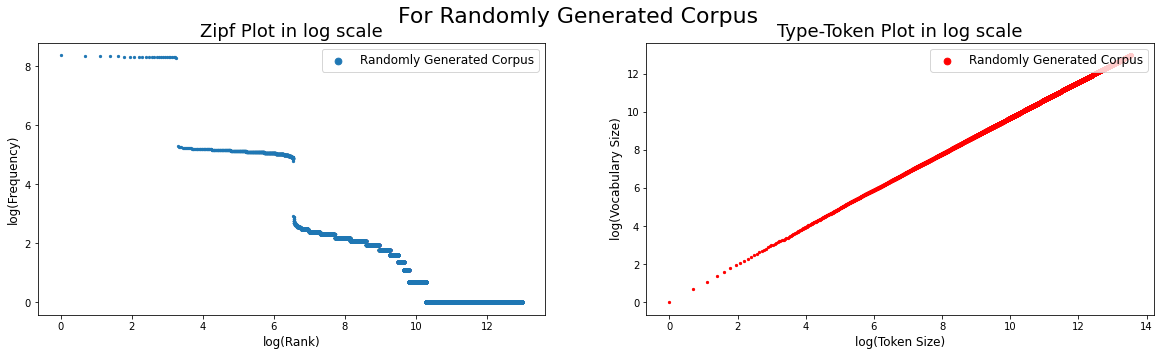

In [78]:
fig,axis = plt.subplots(1,2)
fig.set_size_inches(20, 5)
plt_title = 'For Randomly Generated Corpus'
fig.suptitle(plt_title, fontsize=22)
input_path=os.path.join(os.getcwd(),'random_words_freq.csv')
freq_df = pd.read_csv(input_path, index_col=False)
axis[0].scatter(freq_df['log(Rank)'], freq_df['log(Frequency)'], s=5)
axis[0].set_title('Zipf Plot in log scale', fontsize=18)
axis[0].set_xlabel('log(Rank)', fontsize=12)
axis[0].set_ylabel('log(Frequency)', fontsize=12)
axis[0].legend(['Randomly Generated Corpus'], loc='upper right', fontsize=12, markerscale=3)

input_path=os.path.join(os.getcwd(),'typettoken_random.csv')
typetoken_df = pd.read_csv(input_path, index_col=False)
axis[1].scatter(typetoken_df['log(Token Size)'], typetoken_df['log(Vocabulary Size)'], s=5, color='red')
axis[1].set_title('Type-Token Plot in log scale', fontsize=18)
axis[1].set_xlabel('log(Token Size)', fontsize=12)
axis[1].set_ylabel('log(Vocabulary Size)', fontsize=12)
axis[1].legend(['Randomly Generated Corpus'], loc='upper right', fontsize=12, markerscale=3)

output_path = os.path.join(os.getcwd(), 'random_corpus.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight')
